In [2]:
import numpy as np
print("NumPy version:", np.__version__)

NumPy version: 1.20.0


In [3]:
import pandas as pd
import numpy as np
from numpy import where


In [4]:
import numpy as np

print(np.__version__)


1.20.0


In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import os
import xgboost as xgb
from pylab import rcParams
# default values to be used
pd.options.display.max_columns = 100
TOOLS = "hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
from collections import Counter
from numpy import where
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE

import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

from sklearn.metrics import roc_curve, auc




In [6]:
labels = pd.read_csv("data/Labels.csv")
train_values = pd.read_csv("data/Training_values.csv")
test_values = pd.read_csv("data/Test_values.csv")
all_dataset = pd.read_csv("data/merged_dataset.csv")
training_NEW= pd.read_csv("data/training_NEW.csv")
training_labels=pd.read_csv("data/trainingLabels_NEW.csv")

In [7]:
pd.set_option('display.max_columns', None)

test_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,1988,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,NaN,False,1994,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,NaN,NaN,2010,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,Lake Nyasa,Namakinga B,Ruvuma,10,2,Songea Rural,Maposeni,150,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa maposeni,True,2009,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [8]:
if 'Internal' in train_values.values:
    print("'Internal' column found in train_values.")
else:
    print("'basin_Lake Nyasa' column not found in train_values.")


'Internal' column found in train_values.


In [9]:
none_rows = training_NEW[training_NEW['scheme_management'] == 'None']
none_rows

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
23603,23849,50.0,2013-03-18,0,-11,0,39.431194,-7.100783,Kwa Nyamtawa,0,Wami / Ruvu,Songani,Dar es Salaam,7,3,Temeke,Pemba Mnazi,40,True,GeoData Consultants Ltd,None,NaN,False,2000,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe


In [10]:
#Missing columns: ['scheme_management_None', 'extraction_type_other - mkulima/shinyanga']
#Extra columns: []
#Number of missing columns: 2
#Number of extra columns: 0

In [11]:

Total = df.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = df.isnull().sum()/df.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

NameError: name 'df' is not defined

In [ ]:
print(df.isnull().sum())

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s

In [ ]:
df

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,pop/year
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,12,9.083333
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,No Record,GeoData Consultants Ltd,Other,No Record,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3,93.333333
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4,62.500000
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,No Record,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,27,2.148148
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,No Record,No Record,True,1993,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,18,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,functional,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,14,8.928571
59396,27263,functional,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,15,3.733333
59397,37057,functional,0.0,2011-04-11,No Record,0,No Record,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,No Record,False,1993,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,18,0.055556
59398,31282,functional,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,No Record,True,1993,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient

# Preparing training data

In [ ]:
training_NEW= pd.read_csv("data/training_NEW.csv")
training_labels=pd.read_csv("data/trainingLabels_NEW.csv")
merged_df = pd.merge(training_labels, training_NEW, on='id')

In [ ]:


merged_df['construction_year'] = merged_df['construction_year'].replace({0:1993})
merged_df['age'] = merged_df['date_recorded'].astype(str).str[:4].astype(int) - merged_df['construction_year']
merged_df['pop/year'] = merged_df['population'].replace({0:1}) / merged_df['age'].replace({0:1})
merged_df.scheme_name= merged_df.scheme_name.fillna('No Record')
merged_df.scheme_management = merged_df.scheme_management.fillna('No Record')
merged_df.installer = merged_df.installer.fillna('No Record')
merged_df.funder = merged_df.funder.fillna('No Record')
merged_df.public_meeting = merged_df.public_meeting.fillna('No Record')
merged_df.permit = merged_df.permit.fillna('No Record')
merged_df.subvillage = merged_df.subvillage.fillna('No Record')

merged_df.loc[merged_df['status_group'] == 'functional needs repair', 'status_group'] = 'functional'

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_status=merged_df[['id', 'status_group']]
df_status['status_group']= label_encoder.fit_transform(df_status['status_group'])  

<ipython-input-23-52648d1b990d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status['status_group']= label_encoder.fit_transform(df_status['status_group'])


In [ ]:


merged_df['water_/_person'] = merged_df['amount_tsh'].replace({0:1}) / merged_df['population'].replace({0:1})

def reverse_cardinality_check(n, merged_df):

# this function will search the dataframe for features above the cardinality limit, 
# then create a dict from the results

  
  feature_list = []
  
  cardinality_value = []
  
  for _ in range(len(merged_df.columns)):
    if len(merged_df[merged_df.columns[_]].value_counts()) > n:
      
      feature_list.append(merged_df.columns[_])
      
      cardinality_value.append(len(merged_df[merged_df.columns[_]].value_counts()))
                               
        
  feature_dict = dict(zip(feature_list, cardinality_value))
  
  return feature_dict

high_cardinality_feature_dict = reverse_cardinality_check(150, merged_df)
  
high_cardinality_features = merged_df[list(high_cardinality_feature_dict.keys())]
low_cardinality_features = merged_df.drop(columns = list(high_cardinality_feature_dict.keys()))

one_hot_encode = ce.OneHotEncoder(use_cat_names=True)
one_hot_encode.fit(low_cardinality_features)
low_cardinality_features = one_hot_encode.transform(low_cardinality_features)
ordinal_encode = ce.OrdinalEncoder()
ordinal_encode.fit(high_cardinality_features)
high_cardinality_features = ordinal_encode.transform(high_cardinality_features)

frames =[low_cardinality_features, high_cardinality_features]

features = pd.concat(frames, axis = 1)

df_1 = df_status.merge(features, left_on='id', right_on='id')

In [ ]:
df_1

,id,status_group,status_group_functional,status_group_non functional,amount_tsh,num_private,basin_Lake Nyasa,basin_Lake Victoria,basin_Pangani,basin_Ruvuma / Southern Coast,basin_Internal,basin_Lake Tanganyika,basin_Wami / Ruvu,basin_Rufiji,basin_Lake Rukwa,region_Iringa,region_Mara,region_Manyara,region_Mtwara,region_Kagera,region_Tanga,region_Shinyanga,region_Tabora,region_Pwani,region_Ruvuma,region_Kilimanjaro,region_Rukwa,region_Mwanza,region_Kigoma,region_Lindi,region_Dodoma,region_Arusha,region_Mbeya,region_Singida,region_Morogoro,region_Dar es Salaam,region_code,district_code,lga_Ludewa,lga_Serengeti,lga_Simanjiro,lga_Nanyumbu,lga_Karagwe,lga_Mkinga,lga_Shinyanga Rural,lga_Kahama,lga_Tabora Urban,lga_Mkuranga,lga_Namtumbo,lga_Maswa,lga_Siha,lga_Meatu,lga_Sumbawanga Rural,lga_Njombe,lga_Ukerewe,lga_Bariadi,lga_Same,lga_Kigoma Rural,lga_Moshi Rural,lga_Lindi Rural,lga_Rombo,lga_Chamwino,lga_Bagamoyo,lga_Mafia,lga_Arusha Rural,lga_Kyela,lga_Kondoa,lga_Kilolo,lga_Kibondo,lga_Makete,lga_Singida Rural,lga_Masasi,lga_Rungwe,lga_Moshi Urban,lga_Geita,lga_Mbulu,lga_Bukoba Rural,lga_Muheza,lga_Lushoto,lga_Meru,lga_Iramba,lga_Kilombero,lga_Mbarali,lga_Kasulu,lga_Bukoba Urban,lga_Korogwe,lga_Bukombe,lga_Morogoro Rural,lga_Kishapu,lga_Musoma Rural,lga_Sengerema,lga_Iringa Rural,lga_Muleba,lga_Dodoma Urban,lga_Ruangwa,lga_Hanang,lga_Misenyi,lga_Missungwi,lga_Songea Rural,lga_Tanga,lga_Tunduru,lga_Hai,lga_Mwanga,lga_Chato,lga_Biharamulo,lga_Ileje,lga_Mpwapwa,lga_Mvomero,lga_Bunda,lga_Kiteto,lga_Longido,lga_Urambo,lga_Mbozi,lga_Sikonge,lga_Ilala,lga_Tarime,lga_Temeke,lga_Mbeya Rural,lga_Magu,lga_Manyoni,lga_Igunga,lga_Kilosa,lga_Babati,lga_Chunya,lga_Mufindi,lga_Mtwara Rural,lga_Ngara,lga_Karatu,lga_Mpanda,lga_Kibaha,lga_Singida Urban,lga_Newala,lga_Nzega,lga_Nkasi,lga_Bahi,lga_Mbinga,lga_Ulanga,lga_Sumbawanga Urban,lga_Morogoro Urban,lga_Tandahimba,lga_Kisarawe,lga_Mtwara Urban,lga_Kilwa,lga_Liwale,lga_Kongwa,lga_Uyui,lga_Rufiji,lga_Kwimba,lga_Monduli,lga_Shinyanga Urban,lga_Ngorongoro,lga_Handeni,lga_Rorya,lga_Pangani,lga_Lindi Urban,lga_Nachingwea,lga_Kinondoni,lga_Kigoma Urban,lga_Ilemela,lga_Kilindi,lga_Arusha Urban,lga_Songea Urban,lga_Nyamagana,public_meeting_True,public_meeting_No Record,public_meeting_False,recorded_by_GeoData Consultants Ltd,scheme_management_VWC,scheme_management_Other,scheme_management_No Record,scheme_management_Private operator,scheme_management_WUG,scheme_management_Water Board,scheme_management_WUA,scheme_management_Water authority,scheme_management_Company,scheme_management_Parastatal,scheme_management_Trust,scheme_management_SWC,scheme_management_None,permit_False,permit_True,permit_No Record,construction_year,extraction_type_gravity,extraction_type_submersible,extraction_type_swn 80,extraction_type_nira/tanira,extraction_type_india mark ii,extraction_type_other,extraction_type_ksb,extraction_type_mono,extraction_type_windmill,extraction_type_afridev,extraction_type_other - rope pump,extraction_type_india mark iii,extraction_type_other - swn 81,extraction_type_other - play pump,extraction_type_cemo,extraction_type_climax,extraction_type_walimi,extraction_type_other - mkulima/shinyanga,extraction_type_group_gravity,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_nira/tanira,extraction_type_group_india mark ii,extraction_type_group_other,extraction_type_group_mono,extraction_type_group_wind-powered,extraction_type_group_afridev,extraction_type_group_rope pump,extraction_type_group_india mark iii,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_class_gravity,extraction_type_class_submersible,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_motorpump,extraction_type_class_wind-powered,extraction_type_class_rope pump,management_vwc,management_wug,management_other,management_private operator,management_water board,management_wua,management_company,management_water authority,management_parastatal,ma

# Visual plotting

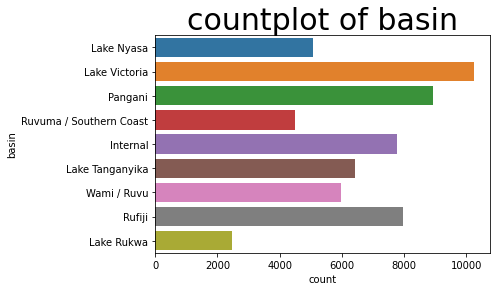

<Figure size 288x288 with 0 Axes>

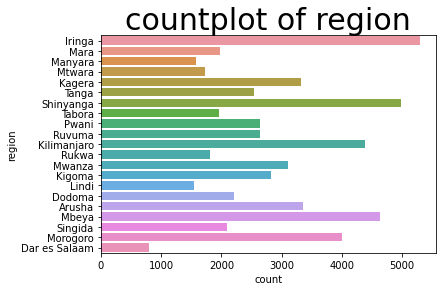

<Figure size 288x288 with 0 Axes>

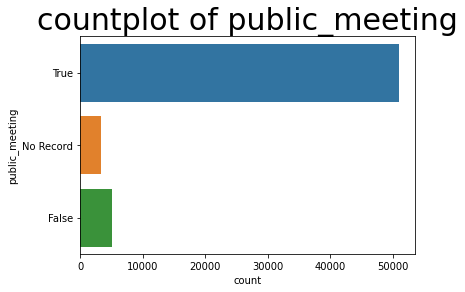

<Figure size 288x288 with 0 Axes>

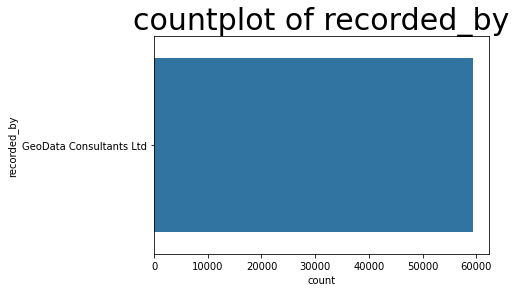

<Figure size 288x288 with 0 Axes>

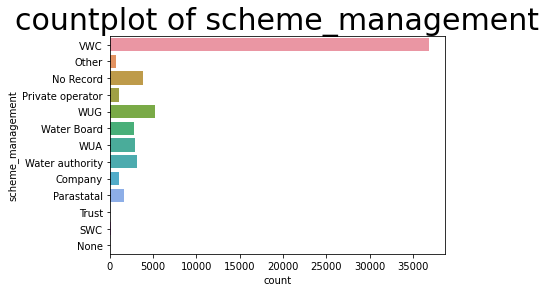

<Figure size 288x288 with 0 Axes>

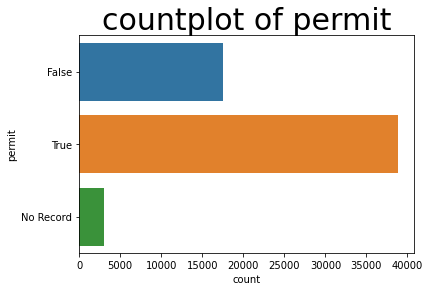

<Figure size 288x288 with 0 Axes>

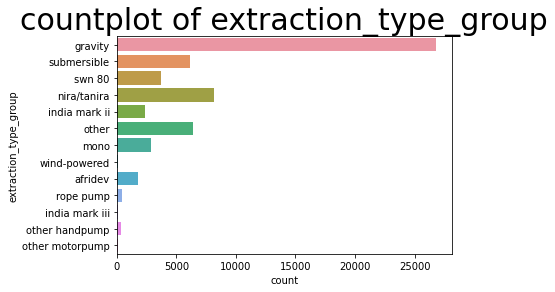

<Figure size 288x288 with 0 Axes>

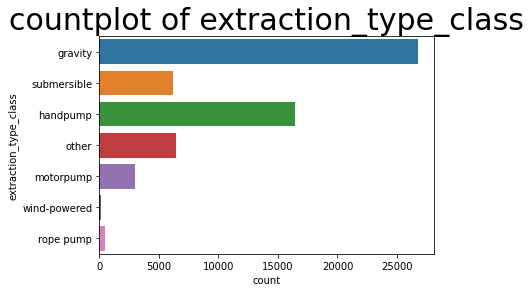

<Figure size 288x288 with 0 Axes>

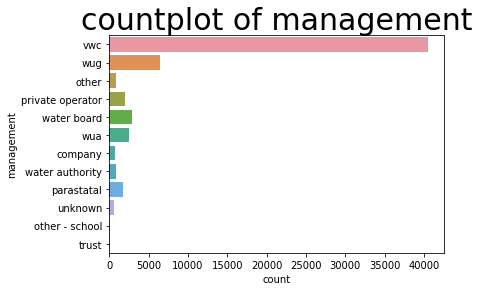

<Figure size 288x288 with 0 Axes>

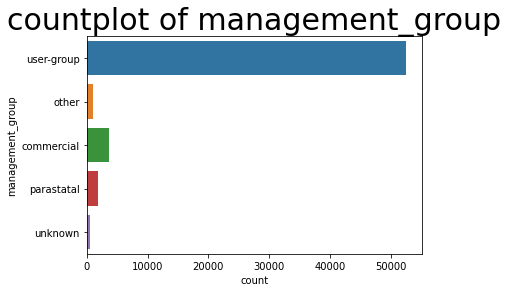

<Figure size 288x288 with 0 Axes>

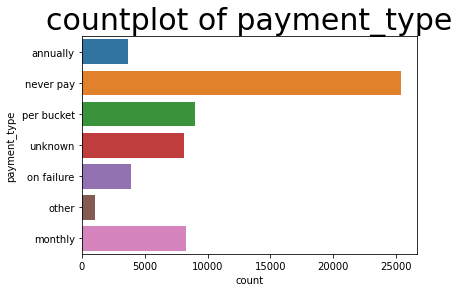

<Figure size 288x288 with 0 Axes>

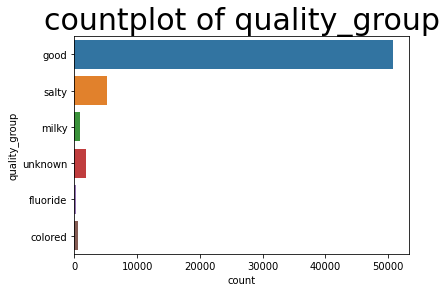

<Figure size 288x288 with 0 Axes>

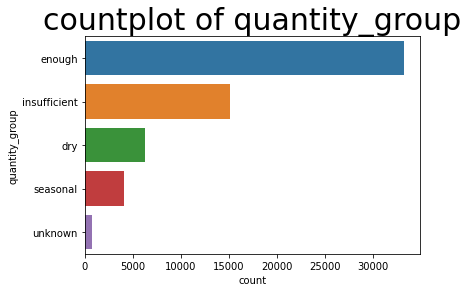

<Figure size 288x288 with 0 Axes>

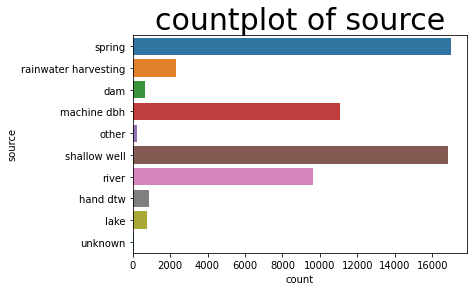

<Figure size 288x288 with 0 Axes>

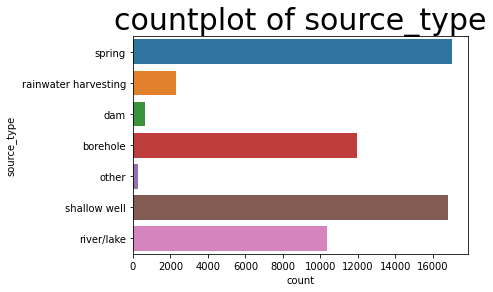

<Figure size 288x288 with 0 Axes>

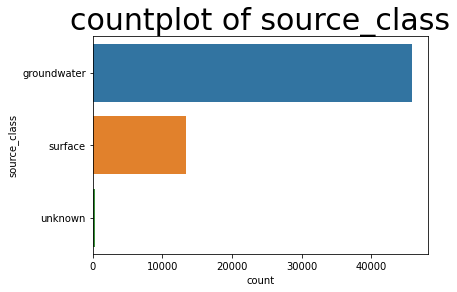

<Figure size 288x288 with 0 Axes>

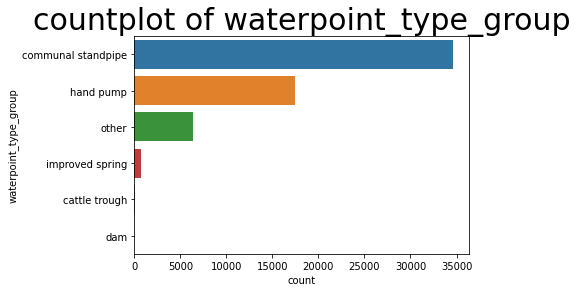

<Figure size 288x288 with 0 Axes>

In [ ]:
categorical = ['basin', 'region', 
         'public_meeting', 'recorded_by',
       'scheme_management', 'permit',
       'extraction_type_group', 'extraction_type_class',
       'management', 'management_group',  'payment_type',
        'quality_group', 'quantity_group',
       'source', 'source_type', 'source_class', 
       'waterpoint_type_group']
categorical

# lets make a for loop to make countplots for our categorical variables.
for col in categorical:
  ax=sns.countplot(y=col,data=merged_df)
  plt.title(f"countplot of {col}", fontsize = 30)
  plt.show(plt.figure(figsize=(4, 4)))

In [ ]:
BBox = ((
    merged_df[merged_df['longitude']!=0].longitude.min(),
    merged_df.longitude.max(),      
    merged_df.latitude.min(),
    merged_df.latitude.max()
))
BBox

(29.6071219, 40.34519307, -11.64944018, -2e-08)

<Figure size 2448x2160 with 0 Axes>

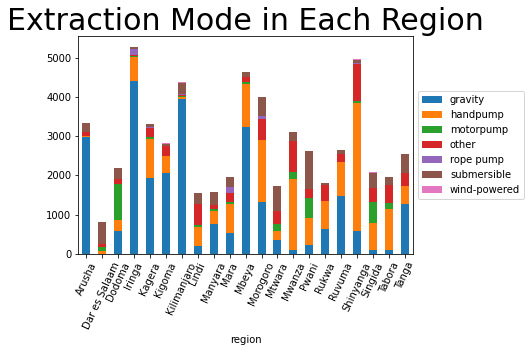

In [ ]:
crosstb = pd.crosstab(merged_df.region, merged_df.extraction_type_class)

# Creating a bar plot
plt.figure(figsize=(34, 30))
pl = crosstb.plot(kind="bar", stacked=True, rot=0)  # Set rot=0 to disable default rotation

# Rotate region titles by 90 degrees
plt.xticks(rotation=65)

plt.title("Extraction Mode in Each Region", fontsize=30)

# Move the legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



<Figure size 2160x1800 with 0 Axes>

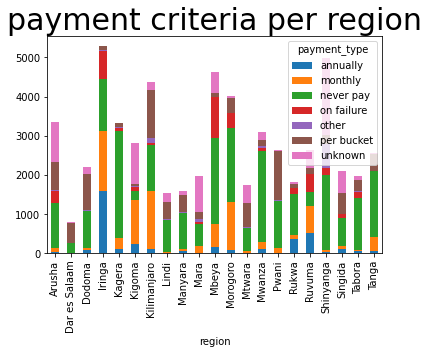

<Figure size 864x864 with 0 Axes>

In [ ]:
crosstb=pd.crosstab(merged_df.region,merged_df.payment_type)

#creating a bar plot
plt.figure(figsize=(30,25))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("payment criteria per region", fontsize=30)
plt.show(plt.figure(figsize=(12, 12)))

<Figure size 2448x2160 with 0 Axes>

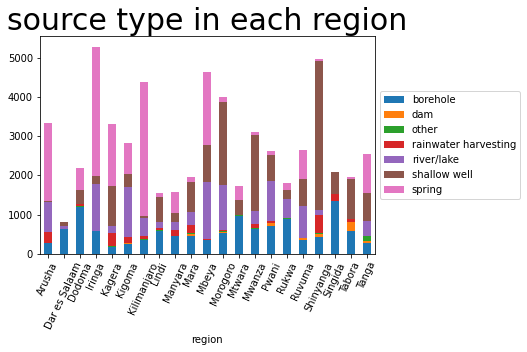

<Figure size 288x288 with 0 Axes>

In [ ]:
crosstb=pd.crosstab(merged_df.region,merged_df.source_type)

#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=65)
plt.title("source type in each region", fontsize=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show(plt.figure(figsize=(4, 4)))

In [ ]:

srt_1=merged_df.sort_values('region',ascending=False)

In [ ]:
srt_2=merged_df.sort_values('management_group',ascending=False)

<Figure size 2448x2160 with 0 Axes>

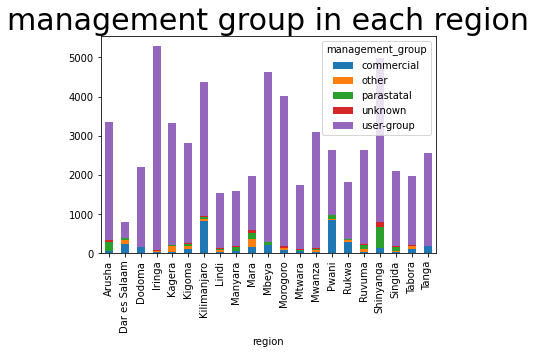

<Figure size 288x288 with 0 Axes>

In [ ]:
crosstb=pd.crosstab(srt_1.region,srt_2.management_group)
#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("management group in each region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

In [ ]:
high_cardinality_features.isnull().sum()

id                0
date_recorded     0
funder            0
gps_height        0
installer         0
longitude         0
latitude          0
wpt_name          0
subvillage        0
ward              0
population        0
scheme_name       0
pop/year          0
water_/_person    0
dtype: int64

In [ ]:

df_status

,id,status_group
0,69572,0
1,8776,0
2,34310,0
3,67743,1
4,19728,0
...,...,...
59395,60739,0
59396,27263,0
59397,37057,0
59398,31282,0


In [ ]:
unique_counts = df_1['status_group'].value_counts()
print(unique_counts)


0    36576
1    22824
Name: status_group, dtype: int64


In [ ]:
df_1

,id,status_group,status_group_functional,status_group_non functional,amount_tsh,num_private,basin_Lake Nyasa,basin_Lake Victoria,basin_Pangani,basin_Ruvuma / Southern Coast,basin_Internal,basin_Lake Tanganyika,basin_Wami / Ruvu,basin_Rufiji,basin_Lake Rukwa,region_Iringa,region_Mara,region_Manyara,region_Mtwara,region_Kagera,region_Tanga,region_Shinyanga,region_Tabora,region_Pwani,region_Ruvuma,region_Kilimanjaro,region_Rukwa,region_Mwanza,region_Kigoma,region_Lindi,region_Dodoma,region_Arusha,region_Mbeya,region_Singida,region_Morogoro,region_Dar es Salaam,region_code,district_code,lga_Ludewa,lga_Serengeti,lga_Simanjiro,lga_Nanyumbu,lga_Karagwe,lga_Mkinga,lga_Shinyanga Rural,lga_Kahama,lga_Tabora Urban,lga_Mkuranga,lga_Namtumbo,lga_Maswa,lga_Siha,lga_Meatu,lga_Sumbawanga Rural,lga_Njombe,lga_Ukerewe,lga_Bariadi,lga_Same,lga_Kigoma Rural,lga_Moshi Rural,lga_Lindi Rural,lga_Rombo,lga_Chamwino,lga_Bagamoyo,lga_Mafia,lga_Arusha Rural,lga_Kyela,lga_Kondoa,lga_Kilolo,lga_Kibondo,lga_Makete,lga_Singida Rural,lga_Masasi,lga_Rungwe,lga_Moshi Urban,lga_Geita,lga_Mbulu,lga_Bukoba Rural,lga_Muheza,lga_Lushoto,lga_Meru,lga_Iramba,lga_Kilombero,lga_Mbarali,lga_Kasulu,lga_Bukoba Urban,lga_Korogwe,lga_Bukombe,lga_Morogoro Rural,lga_Kishapu,lga_Musoma Rural,lga_Sengerema,lga_Iringa Rural,lga_Muleba,lga_Dodoma Urban,lga_Ruangwa,lga_Hanang,lga_Misenyi,lga_Missungwi,lga_Songea Rural,lga_Tanga,lga_Tunduru,lga_Hai,lga_Mwanga,lga_Chato,lga_Biharamulo,lga_Ileje,lga_Mpwapwa,lga_Mvomero,lga_Bunda,lga_Kiteto,lga_Longido,lga_Urambo,lga_Mbozi,lga_Sikonge,lga_Ilala,lga_Tarime,lga_Temeke,lga_Mbeya Rural,lga_Magu,lga_Manyoni,lga_Igunga,lga_Kilosa,lga_Babati,lga_Chunya,lga_Mufindi,lga_Mtwara Rural,lga_Ngara,lga_Karatu,lga_Mpanda,lga_Kibaha,lga_Singida Urban,lga_Newala,lga_Nzega,lga_Nkasi,lga_Bahi,lga_Mbinga,lga_Ulanga,lga_Sumbawanga Urban,lga_Morogoro Urban,lga_Tandahimba,lga_Kisarawe,lga_Mtwara Urban,lga_Kilwa,lga_Liwale,lga_Kongwa,lga_Uyui,lga_Rufiji,lga_Kwimba,lga_Monduli,lga_Shinyanga Urban,lga_Ngorongoro,lga_Handeni,lga_Rorya,lga_Pangani,lga_Lindi Urban,lga_Nachingwea,lga_Kinondoni,lga_Kigoma Urban,lga_Ilemela,lga_Kilindi,lga_Arusha Urban,lga_Songea Urban,lga_Nyamagana,public_meeting_True,public_meeting_No Record,public_meeting_False,recorded_by_GeoData Consultants Ltd,scheme_management_VWC,scheme_management_Other,scheme_management_No Record,scheme_management_Private operator,scheme_management_WUG,scheme_management_Water Board,scheme_management_WUA,scheme_management_Water authority,scheme_management_Company,scheme_management_Parastatal,scheme_management_Trust,scheme_management_SWC,scheme_management_None,permit_False,permit_True,permit_No Record,construction_year,extraction_type_gravity,extraction_type_submersible,extraction_type_swn 80,extraction_type_nira/tanira,extraction_type_india mark ii,extraction_type_other,extraction_type_ksb,extraction_type_mono,extraction_type_windmill,extraction_type_afridev,extraction_type_other - rope pump,extraction_type_india mark iii,extraction_type_other - swn 81,extraction_type_other - play pump,extraction_type_cemo,extraction_type_climax,extraction_type_walimi,extraction_type_other - mkulima/shinyanga,extraction_type_group_gravity,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_nira/tanira,extraction_type_group_india mark ii,extraction_type_group_other,extraction_type_group_mono,extraction_type_group_wind-powered,extraction_type_group_afridev,extraction_type_group_rope pump,extraction_type_group_india mark iii,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_class_gravity,extraction_type_class_submersible,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_motorpump,extraction_type_class_wind-powered,extraction_type_class_rope pump,management_vwc,management_wug,management_other,management_private operator,management_water board,management_wua,management_company,management_water authority,management_parastatal,ma

In [ ]:
X = df_1.drop(['id', 'status_group', 'status_group_functional', 'status_group_non functional'], axis=1).astype(np.float64)
y = df_1['status_group']

In [ ]:
categorical_cols = [cname for cname in X.columns if 
                    X[cname].dtype == "object"]

numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', ce.OneHotEncoder(use_cat_names=True))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])
# define model
model = DecisionTreeClassifier()



In [ ]:
X = df_1.drop(['id', 'status_group', 'status_group_functional', 'status_group_non functional'], axis=1).astype(np.float64)
y = df_1['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train

,amount_tsh,num_private,basin_Lake Nyasa,basin_Lake Victoria,basin_Pangani,basin_Ruvuma / Southern Coast,basin_Internal,basin_Lake Tanganyika,basin_Wami / Ruvu,basin_Rufiji,basin_Lake Rukwa,region_Iringa,region_Mara,region_Manyara,region_Mtwara,region_Kagera,region_Tanga,region_Shinyanga,region_Tabora,region_Pwani,region_Ruvuma,region_Kilimanjaro,region_Rukwa,region_Mwanza,region_Kigoma,region_Lindi,region_Dodoma,region_Arusha,region_Mbeya,region_Singida,region_Morogoro,region_Dar es Salaam,region_code,district_code,lga_Ludewa,lga_Serengeti,lga_Simanjiro,lga_Nanyumbu,lga_Karagwe,lga_Mkinga,lga_Shinyanga Rural,lga_Kahama,lga_Tabora Urban,lga_Mkuranga,lga_Namtumbo,lga_Maswa,lga_Siha,lga_Meatu,lga_Sumbawanga Rural,lga_Njombe,lga_Ukerewe,lga_Bariadi,lga_Same,lga_Kigoma Rural,lga_Moshi Rural,lga_Lindi Rural,lga_Rombo,lga_Chamwino,lga_Bagamoyo,lga_Mafia,lga_Arusha Rural,lga_Kyela,lga_Kondoa,lga_Kilolo,lga_Kibondo,lga_Makete,lga_Singida Rural,lga_Masasi,lga_Rungwe,lga_Moshi Urban,lga_Geita,lga_Mbulu,lga_Bukoba Rural,lga_Muheza,lga_Lushoto,lga_Meru,lga_Iramba,lga_Kilombero,lga_Mbarali,lga_Kasulu,lga_Bukoba Urban,lga_Korogwe,lga_Bukombe,lga_Morogoro Rural,lga_Kishapu,lga_Musoma Rural,lga_Sengerema,lga_Iringa Rural,lga_Muleba,lga_Dodoma Urban,lga_Ruangwa,lga_Hanang,lga_Misenyi,lga_Missungwi,lga_Songea Rural,lga_Tanga,lga_Tunduru,lga_Hai,lga_Mwanga,lga_Chato,lga_Biharamulo,lga_Ileje,lga_Mpwapwa,lga_Mvomero,lga_Bunda,lga_Kiteto,lga_Longido,lga_Urambo,lga_Mbozi,lga_Sikonge,lga_Ilala,lga_Tarime,lga_Temeke,lga_Mbeya Rural,lga_Magu,lga_Manyoni,lga_Igunga,lga_Kilosa,lga_Babati,lga_Chunya,lga_Mufindi,lga_Mtwara Rural,lga_Ngara,lga_Karatu,lga_Mpanda,lga_Kibaha,lga_Singida Urban,lga_Newala,lga_Nzega,lga_Nkasi,lga_Bahi,lga_Mbinga,lga_Ulanga,lga_Sumbawanga Urban,lga_Morogoro Urban,lga_Tandahimba,lga_Kisarawe,lga_Mtwara Urban,lga_Kilwa,lga_Liwale,lga_Kongwa,lga_Uyui,lga_Rufiji,lga_Kwimba,lga_Monduli,lga_Shinyanga Urban,lga_Ngorongoro,lga_Handeni,lga_Rorya,lga_Pangani,lga_Lindi Urban,lga_Nachingwea,lga_Kinondoni,lga_Kigoma Urban,lga_Ilemela,lga_Kilindi,lga_Arusha Urban,lga_Songea Urban,lga_Nyamagana,public_meeting_True,public_meeting_No Record,public_meeting_False,recorded_by_GeoData Consultants Ltd,scheme_management_VWC,scheme_management_Other,scheme_management_No Record,scheme_management_Private operator,scheme_management_WUG,scheme_management_Water Board,scheme_management_WUA,scheme_management_Water authority,scheme_management_Company,scheme_management_Parastatal,scheme_management_Trust,scheme_management_SWC,scheme_management_None,permit_False,permit_True,permit_No Record,construction_year,extraction_type_gravity,extraction_type_submersible,extraction_type_swn 80,extraction_type_nira/tanira,extraction_type_india mark ii,extraction_type_other,extraction_type_ksb,extraction_type_mono,extraction_type_windmill,extraction_type_afridev,extraction_type_other - rope pump,extraction_type_india mark iii,extraction_type_other - swn 81,extraction_type_other - play pump,extraction_type_cemo,extraction_type_climax,extraction_type_walimi,extraction_type_other - mkulima/shinyanga,extraction_type_group_gravity,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_nira/tanira,extraction_type_group_india mark ii,extraction_type_group_other,extraction_type_group_mono,extraction_type_group_wind-powered,extraction_type_group_afridev,extraction_type_group_rope pump,extraction_type_group_india mark iii,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_class_gravity,extraction_type_class_submersible,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_motorpump,extraction_type_class_wind-powered,extraction_type_class_rope pump,management_vwc,management_wug,management_other,management_private operator,management_water board,management_wua,management_company,management_water authority,management_parastatal,management_unknown,management_other - school,management_trust,manageme

In [ ]:
X_test

,amount_tsh,num_private,basin_Lake Nyasa,basin_Lake Victoria,basin_Pangani,basin_Ruvuma / Southern Coast,basin_Internal,basin_Lake Tanganyika,basin_Wami / Ruvu,basin_Rufiji,basin_Lake Rukwa,region_Iringa,region_Mara,region_Manyara,region_Mtwara,region_Kagera,region_Tanga,region_Shinyanga,region_Tabora,region_Pwani,region_Ruvuma,region_Kilimanjaro,region_Rukwa,region_Mwanza,region_Kigoma,region_Lindi,region_Dodoma,region_Arusha,region_Mbeya,region_Singida,region_Morogoro,region_Dar es Salaam,region_code,district_code,lga_Ludewa,lga_Serengeti,lga_Simanjiro,lga_Nanyumbu,lga_Karagwe,lga_Mkinga,lga_Shinyanga Rural,lga_Kahama,lga_Tabora Urban,lga_Mkuranga,lga_Namtumbo,lga_Maswa,lga_Siha,lga_Meatu,lga_Sumbawanga Rural,lga_Njombe,lga_Ukerewe,lga_Bariadi,lga_Same,lga_Kigoma Rural,lga_Moshi Rural,lga_Lindi Rural,lga_Rombo,lga_Chamwino,lga_Bagamoyo,lga_Mafia,lga_Arusha Rural,lga_Kyela,lga_Kondoa,lga_Kilolo,lga_Kibondo,lga_Makete,lga_Singida Rural,lga_Masasi,lga_Rungwe,lga_Moshi Urban,lga_Geita,lga_Mbulu,lga_Bukoba Rural,lga_Muheza,lga_Lushoto,lga_Meru,lga_Iramba,lga_Kilombero,lga_Mbarali,lga_Kasulu,lga_Bukoba Urban,lga_Korogwe,lga_Bukombe,lga_Morogoro Rural,lga_Kishapu,lga_Musoma Rural,lga_Sengerema,lga_Iringa Rural,lga_Muleba,lga_Dodoma Urban,lga_Ruangwa,lga_Hanang,lga_Misenyi,lga_Missungwi,lga_Songea Rural,lga_Tanga,lga_Tunduru,lga_Hai,lga_Mwanga,lga_Chato,lga_Biharamulo,lga_Ileje,lga_Mpwapwa,lga_Mvomero,lga_Bunda,lga_Kiteto,lga_Longido,lga_Urambo,lga_Mbozi,lga_Sikonge,lga_Ilala,lga_Tarime,lga_Temeke,lga_Mbeya Rural,lga_Magu,lga_Manyoni,lga_Igunga,lga_Kilosa,lga_Babati,lga_Chunya,lga_Mufindi,lga_Mtwara Rural,lga_Ngara,lga_Karatu,lga_Mpanda,lga_Kibaha,lga_Singida Urban,lga_Newala,lga_Nzega,lga_Nkasi,lga_Bahi,lga_Mbinga,lga_Ulanga,lga_Sumbawanga Urban,lga_Morogoro Urban,lga_Tandahimba,lga_Kisarawe,lga_Mtwara Urban,lga_Kilwa,lga_Liwale,lga_Kongwa,lga_Uyui,lga_Rufiji,lga_Kwimba,lga_Monduli,lga_Shinyanga Urban,lga_Ngorongoro,lga_Handeni,lga_Rorya,lga_Pangani,lga_Lindi Urban,lga_Nachingwea,lga_Kinondoni,lga_Kigoma Urban,lga_Ilemela,lga_Kilindi,lga_Arusha Urban,lga_Songea Urban,lga_Nyamagana,public_meeting_True,public_meeting_No Record,public_meeting_False,recorded_by_GeoData Consultants Ltd,scheme_management_VWC,scheme_management_Other,scheme_management_No Record,scheme_management_Private operator,scheme_management_WUG,scheme_management_Water Board,scheme_management_WUA,scheme_management_Water authority,scheme_management_Company,scheme_management_Parastatal,scheme_management_Trust,scheme_management_SWC,scheme_management_None,permit_False,permit_True,permit_No Record,construction_year,extraction_type_gravity,extraction_type_submersible,extraction_type_swn 80,extraction_type_nira/tanira,extraction_type_india mark ii,extraction_type_other,extraction_type_ksb,extraction_type_mono,extraction_type_windmill,extraction_type_afridev,extraction_type_other - rope pump,extraction_type_india mark iii,extraction_type_other - swn 81,extraction_type_other - play pump,extraction_type_cemo,extraction_type_climax,extraction_type_walimi,extraction_type_other - mkulima/shinyanga,extraction_type_group_gravity,extraction_type_group_submersible,extraction_type_group_swn 80,extraction_type_group_nira/tanira,extraction_type_group_india mark ii,extraction_type_group_other,extraction_type_group_mono,extraction_type_group_wind-powered,extraction_type_group_afridev,extraction_type_group_rope pump,extraction_type_group_india mark iii,extraction_type_group_other handpump,extraction_type_group_other motorpump,extraction_type_class_gravity,extraction_type_class_submersible,extraction_type_class_handpump,extraction_type_class_other,extraction_type_class_motorpump,extraction_type_class_wind-powered,extraction_type_class_rope pump,management_vwc,management_wug,management_other,management_private operator,management_water board,management_wua,management_company,management_water authority,management_parastatal,management_unknown,management_other - school,management_trust,manageme

In [ ]:
y_train

43069    1
58858    0
41707    1
30674    0
20944    0
        ..
54343    0
38158    0
860      1
15795    0
56422    1
Name: status_group, Length: 41580, dtype: int32

In [ ]:
y_test

2980     1
5246     0
22659    0
39888    1
13361    0
        ..
13160    0
3852     1
28598    0
43736    0
41923    0
Name: status_group, Length: 17820, dtype: int32

In [ ]:
# Create a pipeline that combines the preprocessor with the model
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# split data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Fit the model
my_pipeline.fit(X_train, y_train)
# manual cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = []
for train_index, val_index in kf.split(X_train):
    cv_train_X, cv_val_X = X_train.iloc[train_index], X_train.iloc[val_index]
    cv_train_y, cv_val_y = y_train.iloc[train_index], y_train.iloc[val_index]
    
    my_pipeline.fit(cv_train_X, cv_train_y)
    cv_preds = my_pipeline.predict(cv_val_X)
    cv_score = accuracy_score(cv_val_y, cv_preds)
    cv_scores.append(cv_score)

print("Cross-validation accuracy: %f" % np.mean(cv_scores))
# predict on test data
preds_test = my_pipeline.predict(X_test)
# evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("Test accuracy: %f" % test_accuracy)

Cross-validation accuracy: 0.802140
Test accuracy: 0.804209


In [ ]:
roc_curves = []

# Compute ROC curve and ROC area for the first model
preds_test_prob = my_pipeline.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, preds_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
model_name = "Initial DT Model"  # Specify the name of your model

# Store the ROC curve and AUC in the list
roc_curves.append((fpr, tpr, roc_auc, model_name))



In [ ]:
roc_curves

[(array([0.        , 0.15875465, 1.        ]),
  array([0.        , 0.74423049, 1.        ]),
  0.7927379173242224,
  'Initial DT Model')]

In [ ]:
# check overfitting or underfitting
if np.mean(cv_scores) < test_accuracy:
    print("The model is likely overfitting")
elif np.mean(cv_scores) > test_accuracy:
    print("The model is likely underfitting")
else:
    print("The model seems well-fitted")

The model is likely overfitting


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, preds_test))
print("Precision:", metrics.precision_score(y_test, preds_test, average='macro'))
print("Recall:", metrics.recall_score(y_test, preds_test, average='macro'))
print("F1 Score:", metrics.f1_score(y_test, preds_test, average='macro'))


Accuracy: 0.8042087542087543
Precision: 0.7925901751696732
Recall: 0.7927379173242224
F1 Score: 0.7926638134894118


Confusion Matrix:
[[9268 1749]
 [1740 5063]]


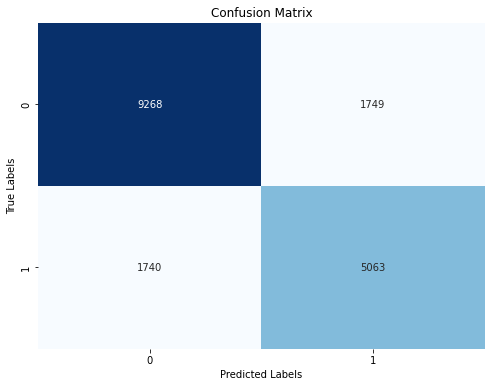

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, preds_test)
print("Confusion Matrix:")
print(confusion_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

In [ ]:
# Get feature names
feature_names = my_pipeline.named_steps['preprocessor'].transformers_[0][2] + my_pipeline.named_steps['preprocessor'].transformers_[1][2]

# Fit the model to get feature importances
my_pipeline.fit(X_train, y_train)

# Get feature importances from the 'model' step of the pipeline
importances = my_pipeline.named_steps['model'].feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))


Feature ranking:
1. feature 265 (0.170450): quantity_dry
2. feature 302 (0.082592): waterpoint_type_group_other
3. feature 312 (0.078521): latitude
4. feature 311 (0.077637): longitude
5. feature 313 (0.047606): wpt_name
6. feature 309 (0.041986): gps_height
7. feature 314 (0.041468): subvillage
8. feature 306 (0.032543): age
9. feature 307 (0.031956): date_recorded
10. feature 318 (0.028495): pop/year
11. feature 315 (0.027038): ward
12. feature 308 (0.020517): funder
13. feature 0 (0.018765): amount_tsh
14. feature 310 (0.018371): installer
15. feature 317 (0.017836): scheme_name
16. feature 319 (0.013533): water_/_person
17. feature 294 (0.011810): waterpoint_type_communal standpipe multiple
18. feature 179 (0.011611): construction_year
19. feature 32 (0.010972): region_code
20. feature 316 (0.010492): population
21. feature 211 (0.007511): extraction_type_class_gravity
22. feature 33 (0.007454): district_code
23. feature 17 (0.005274): region_Shinyanga
24. feature 122 (0.005227): l

# SMOTE re-sampling model

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [ ]:
from imblearn.pipeline import Pipeline as imPipeline

# define resampling with adjusted ratio
resample = SMOTE(sampling_strategy=0.7)  # Adjust the ratio as needed

# define the pipeline with the updated resampling strategy
my_pipeline = imPipeline(steps=[('r', resample),
                                ('preprocessor', preprocessor),
                                ('model', model)])


# manual cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = []

for train_index, val_index in kf.split(X_train):
    cv_train_X, cv_val_X = X_train.iloc[train_index], X_train.iloc[val_index]
    cv_train_y, cv_val_y = y_train.iloc[train_index], y_train.iloc[val_index]
    
    my_pipeline.fit(cv_train_X, cv_train_y)
    cv_preds = my_pipeline.predict(cv_val_X)
    cv_score = accuracy_score(cv_val_y, cv_preds)
    cv_scores.append(cv_score)

print("Cross-validation accuracy: %f" % np.mean(cv_scores))

# predict on test data
preds_test = my_pipeline.predict(X_test)

# evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("Test accuracy: %f" % test_accuracy)

# check overfitting or underfitting
if np.mean(cv_scores) < test_accuracy:
    print("The model is likely overfitting")
elif np.mean(cv_scores) > test_accuracy:
    print("The model is likely underfitting")
else:
    print("The model seems well-fitted")

Cross-validation accuracy: 0.802910
Test accuracy: 0.802245
The model is likely underfitting


In [ ]:
# Compute ROC curve and ROC area for the second model
preds_test_prob = my_pipeline.predict_proba(X_test)  # Make sure this is the right pipeline for the second model
fpr, tpr, _ = roc_curve(y_test, preds_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
model_name = "SMOTE Scaled DT Model"  # Specify the name of your model

# Store the ROC curve and AUC in the list
roc_curves.append((fpr, tpr, roc_auc, model_name))


In [ ]:
roc_curves

[(array([0.        , 0.15875465, 1.        ]),
  array([0.        , 0.74423049, 1.        ]),
  0.7927379173242224,
  'Initial DT Model'),
 (array([0.        , 0.16465462, 1.        ]),
  array([0.        , 0.74864031, 1.        ]),
  0.7919928405382506,
  'SMOTE Scaled DT Model')]

# XGBoost Classifier

In [ ]:
#NEW TRY
# prepare test data for this elite XGBoost model
# Create age and pop/year columns
# test_values['construction_year'] = test_values['construction_year'].replace({0:1993})
# test_values['age'] = test_values['date_recorded'].astype(str).str[:4].astype(int) - test_values['construction_year']
# test_values['pop/year'] = test_values['population'].replace({0:1}) / test_values['age'].replace({0:1})

# Fill missing values
# test_values.scheme_name = test_values.scheme_name.fillna('No Record')
# test_values.scheme_management = test_values.scheme_management.fillna('No Record')
# test_values.installer = test_values.installer.fillna('No Record')
# test_values.funder = test_values.funder.fillna('No Record')
# test_values.public_meeting = test_values.public_meeting.fillna('No Record')
# test_values.permit = test_values.permit.fillna('No Record')
# test_values.subvillage = test_values.subvillage.fillna('No Record')

# Calculate water_/_person

# test_values['water_/_person'] = test_values['amount_tsh'].replace({0:1}) / test_values['population'].replace({0:1})
# test_values['status_group'] = np.nan

# Merge the additional columns with the test data

# df_test = test_values.merge(features, on='id')
# df_status=test_values[['id', 'status_group']]

# label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
# df_status['status_group']= label_encoder.fit_transform(df_status['status_group'])  


# def reverse_cardinality_check(n, test_values):

# this function will search the dataframe for features above the cardinality limit, 
# then create a dict from the results

  
  # feature_list = []
  
  # cardinality_value = []
  
  # for _ in range(len(test_values.columns)):
    # if len(test_values[test_values.columns[_]].value_counts()) > n:
      
      # feature_list.append(test_values.columns[_])
      
      # cardinality_value.append(len(test_values[test_values.columns[_]].value_counts()))
                               
        
  # feature_dict = dict(zip(feature_list, cardinality_value))
  
  # return feature_dict

  # high_cardinality_feature_dict = reverse_cardinality_check(150, test_values)
  
# high_cardinality_features = test_values[list(high_cardinality_feature_dict.keys())]
# low_cardinality_features = test_values.drop(columns = list(high_cardinality_feature_dict.keys()))

# one_hot_encode = ce.OneHotEncoder(use_cat_names=True)
# one_hot_encode.fit(low_cardinality_features)
# low_cardinality_features = one_hot_encode.transform(low_cardinality_features)
# ordinal_encode = ce.OrdinalEncoder()
# ordinal_encode.fit(high_cardinality_features)
# high_cardinality_features = ordinal_encode.transform(high_cardinality_features)

# frames =[low_cardinality_features, high_cardinality_features]

# features = pd.concat(frames, axis = 1)

# df_test = df_status.merge(features, left_on='id', right_on='id')

<ipython-input-343-30c7b5313225>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status['status_group']= label_encoder.fit_transform(df_status['status_group'])


In [ ]:
# df_test.drop('status_group_y', axis=1, inplace=True)
# df_test.rename(columns={'status_group_x': 'status_group'}, inplace=True)

# df_test

,id,status_group,amount_tsh,num_private,basin_Internal,basin_Pangani,basin_Ruvuma / Southern Coast,basin_Rufiji,basin_Lake Victoria,basin_Lake Tanganyika,basin_Wami / Ruvu,basin_Lake Rukwa,basin_Lake Nyasa,region_Manyara,region_Arusha,region_Singida,region_Lindi,region_Ruvuma,region_Iringa,region_Mtwara,region_Kilimanjaro,region_Tabora,region_Mwanza,region_Pwani,region_Tanga,region_Shinyanga,region_Dar es Salaam,region_Kigoma,region_Dodoma,region_Morogoro,region_Mbeya,region_Kagera,region_Mara,region_Rukwa,region_code,district_code,lga_Mbulu,lga_Arusha Rural,lga_Singida Rural,lga_Liwale,lga_Mbinga,lga_Kilolo,lga_Tandahimba,lga_Newala,lga_Siha,lga_Hai,lga_Simanjiro,lga_Igunga,lga_Kwimba,lga_Iringa Rural,...,quantity_group_dry,quantity_group_enough,quantity_group_unknown,source_rainwater harvesting,source_spring,source_shallow well,source_machine dbh,source_river,source_lake,source_dam,source_hand dtw,source_unknown,source_other,source_type_rainwater harvesting,source_type_spring,source_type_shallow well,source_type_borehole,source_type_river/lake,source_type_dam,source_type_other,source_class_surface,source_class_groundwater,source_class_unknown,waterpoint_type_other,waterpoint_type_communal standpipe,waterpoint_type_hand pump,waterpoint_type_communal standpipe multiple,waterpoint_type_improved spring,waterpoint_type_cattle trough,waterpoint_type_dam,waterpoint_type_group_other,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_cattle trough,waterpoint_type_group_dam,age,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,subvillage,ward,population,scheme_name,pop/year,water_/_person
0,50785,0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1996,1,35.290799,-4.059696,1,1,1,321,1,321.000000,0.003115
1,51630,9891,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,13,1,2,1569,2,36.656709,-3.309214,2,2,2,300,2,23.076923,0.003333
2,17168,9892,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3,2,3,1567,3,34.767863,-5.004344,3,3,3,500,3,166.666667,0.002000
3,45559,9893,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,26,3,4,267,4,38.058046,-9.418672,4,4,4,250,1,9.615385,0.004000
4,49871,9894,500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,13,4,5,1260,5,35.006123,-10.950412,5,5,5,60,4,4.615385,8.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,4953,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,23,15,13,34,76,38.852669,-6.582841,10838,7456,309,20,97,0.869565,0.050000
14846,18990,4954,1000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,17,102,566,0,597,37.451633,-5.350428,10839,3093,560,2960,1,174.117647,0.337838
14847,28749,4955,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
# Get the column names of the fitted transformer
#transformer_cols = preprocessor.transformers_[0][2] + preprocessor.transformers_[1][2]

# Get the column names of the input data
# input_cols = X_test.columns

# Find the columns to drop
# columns_to_drop = set(input_cols) - set(transformer_cols)

# Drop the extra columns from X_test
# X_test_dropped = X_test.drop(columns_to_drop, axis=1)


In [ ]:
import sys

In [ ]:

# Set the maximum number of columns to display
# pd.set_option("display.max_columns", None)

# Get the column names of the fitted transformer
# transformer_cols = preprocessor.transformers_[0][2] + preprocessor.transformers_[1][2]

# Get the column names of the input data
# input_cols = list(X_test.columns)

# Print the column names without limit
# print("Transformer columns:", transformer_cols)
# print("Input columns:", input_cols)


Transformer columns: ['amount_tsh', 'num_private', 'basin_Lake Nyasa', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Ruvuma / Southern Coast', 'basin_Internal', 'basin_Lake Tanganyika', 'basin_Wami / Ruvu', 'basin_Rufiji', 'basin_Lake Rukwa', 'region_Iringa', 'region_Mara', 'region_Manyara', 'region_Mtwara', 'region_Kagera', 'region_Tanga', 'region_Shinyanga', 'region_Tabora', 'region_Pwani', 'region_Ruvuma', 'region_Kilimanjaro', 'region_Rukwa', 'region_Mwanza', 'region_Kigoma', 'region_Lindi', 'region_Dodoma', 'region_Arusha', 'region_Mbeya', 'region_Singida', 'region_Morogoro', 'region_Dar es Salaam', 'region_code', 'district_code', 'lga_Ludewa', 'lga_Serengeti', 'lga_Simanjiro', 'lga_Nanyumbu', 'lga_Karagwe', 'lga_Mkinga', 'lga_Shinyanga Rural', 'lga_Kahama', 'lga_Tabora Urban', 'lga_Mkuranga', 'lga_Namtumbo', 'lga_Maswa', 'lga_Siha', 'lga_Meatu', 'lga_Sumbawanga Rural', 'lga_Njombe', 'lga_Ukerewe', 'lga_Bariadi', 'lga_Same', 'lga_Kigoma Rural', 'lga_Moshi Rural', 'lga_Lindi Rural

In [ ]:
#transformer_columns = ['amount_tsh', 'num_private', 'basin_Lake Nyasa', 'basin_Lake Victoria', 'basin_Pangani', 'basin_Ruvuma / Southern Coast', 'basin_Internal', 'basin_Lake Tanganyika', 'basin_Wami / Ruvu', 'basin_Rufiji', 'basin_Lake Rukwa', 'region_Iringa', 'region_Mara', 'region_Manyara', 'region_Mtwara', 'region_Kagera', 'region_Tanga', 'region_Shinyanga', 'region_Tabora', 'region_Pwani', 'region_Ruvuma', 'region_Kilimanjaro', 'region_Rukwa', 'region_Mwanza', 'region_Kigoma', 'region_Lindi', 'region_Dodoma', 'region_Arusha', 'region_Mbeya', 'region_Singida', 'region_Morogoro', 'region_Dar es Salaam', 'region_code', 'district_code', 'lga_Ludewa', 'lga_Serengeti', 'lga_Simanjiro', 'lga_Nanyumbu', 'lga_Karagwe', 'lga_Mkinga', 'lga_Shinyanga Rural', 'lga_Kahama', 'lga_Tabora Urban', 'lga_Mkuranga', 'lga_Namtumbo', 'lga_Maswa', 'lga_Siha', 'lga_Meatu', 'lga_Sumbawanga Rural', 'lga_Njombe', 'lga_Ukerewe', 'lga_Bariadi', 'lga_Same', 'lga_Kigoma Rural', 'lga_Moshi Rural', 'lga_Lindi Rural', 'lga_Rombo', 'lga_Chamwino', 'lga_Bagamoyo', 'lga_Mafia', 'lga_Arusha Rural', 'lga_Kyela', 'lga_Kondoa', 'lga_Kilolo', 'lga_Kibondo', 'lga_Makete', 'lga_Singida Rural', 'lga_Masasi', 'lga_Rungwe', 'lga_Moshi Urban', 'lga_Geita', 'lga_Mbulu', 'lga_Bukoba Rural', 'lga_Muheza', 'lga_Lushoto', 'lga_Meru', 'lga_Iramba', 'lga_Kilombero', 'lga_Mbarali', 'lga_Kasulu', 'lga_Bukoba Urban', 'lga_Korogwe', 'lga_Bukombe', 'lga_Morogoro Rural', 'lga_Kishapu', 'lga_Musoma Rural', 'lga_Sengerema', 'lga_Iringa Rural', 'lga_Muleba', 'lga_Dodoma Urban', 'lga_Ruangwa', 'lga_Hanang', 'lga_Misenyi', 'lga_Missungwi', 'lga_Songea Rural', 'lga_Tanga', 'lga_Tunduru', 'lga_Hai', 'lga_Mwanga', 'lga_Chato', 'lga_Biharamulo', 'lga_Ileje', 'lga_Mpwapwa', 'lga_Mvomero', 'lga_Bunda', 'lga_Kiteto', 'lga_Longido', 'lga_Urambo', 'lga_Mbozi', 'lga_Sikonge', 'lga_Ilala', 'lga_Tarime', 'lga_Temeke', 'lga_Mbeya Rural', 'lga_Magu', 'lga_Manyoni', 'lga_Igunga', 'lga_Kilosa', 'lga_Babati', 'lga_Chunya', 'lga_Mufindi', 'lga_Mtwara Rural', 'lga_Ngara', 'lga_Karatu', 'lga_Mpanda', 'lga_Kibaha', 'lga_Singida Urban', 'lga_Newala', 'lga_Nzega', 'lga_Nkasi', 'lga_Bahi', 'lga_Mbinga', 'lga_Ulanga', 'lga_Sumbawanga Urban', 'lga_Morogoro Urban', 'lga_Tandahimba', 'lga_Kisarawe', 'lga_Mtwara Urban', 'lga_Kilwa', 'lga_Liwale', 'lga_Kongwa', 'lga_Uyui', 'lga_Rufiji', 'lga_Kwimba', 'lga_Monduli', 'lga_Shinyanga Urban', 'lga_Ngorongoro', 'lga_Handeni', 'lga_Rorya', 'lga_Pangani', 'lga_Lindi Urban', 'lga_Nachingwea', 'lga_Kinondoni', 'lga_Kigoma Urban', 'lga_Ilemela', 'lga_Kilindi', 'lga_Arusha Urban', 'lga_Songea Urban', 'lga_Nyamagana', 'public_meeting_True', 'public_meeting_No Record', 'public_meeting_False', 'recorded_by_GeoData Consultants Ltd', 'scheme_management_VWC', 'scheme_management_Other', 'scheme_management_No Record', 'scheme_management_Private operator', 'scheme_management_WUG', 'scheme_management_Water Board', 'scheme_management_WUA', 'scheme_management_Water authority', 'scheme_management_Company', 'scheme_management_Parastatal', 'scheme_management_Trust', 'scheme_management_SWC', 'scheme_management_None', 'permit_False', 'permit_True', 'permit_No Record', 'construction_year', 'extraction_type_gravity', 'extraction_type_submersible', 'extraction_type_swn 80', 'extraction_type_nira/tanira', 'extraction_type_india mark ii', 'extraction_type_other', 'extraction_type_ksb', 'extraction_type_mono', 'extraction_type_windmill', 'extraction_type_afridev', 'extraction_type_other - rope pump', 'extraction_type_india mark iii', 'extraction_type_other - swn 81', 'extraction_type_other - play pump', 'extraction_type_cemo', 'extraction_type_climax', 'extraction_type_walimi', 'extraction_type_other - mkulima/shinyanga', 'extraction_type_group_gravity', 'extraction_type_group_submersible', 'extraction_type_group_swn 80', 'extraction_type_group_nira/tanira', 'extraction_type_group_india mark ii', 'extraction_type_group_other', 'extraction_type_group_mono', 'extraction_type_group_wind-powered', 'extraction_type_group_afridev', 'extraction_type_group_rope pump', 'extraction_type_group_india mark iii', 'extraction_type_group_other handpump', 'extraction_type_group_other motorpump', 'extraction_type_class_gravity', 'extraction_type_class_submersible', 'extraction_type_class_handpump', 'extraction_type_class_other', 'extraction_type_class_motorpump', 'extraction_type_class_wind-powered', 'extraction_type_class_rope pump', 'management_vwc', 'management_wug', 'management_other', 'management_private operator', 'management_water board', 'management_wua', 'management_company', 'management_water authority', 'management_parastatal', 'management_unknown', 'management_other - school', 'management_trust', 'management_group_user-group', 'management_group_other', 'management_group_commercial', 'management_group_parastatal', 'management_group_unknown', 'payment_pay annually', 'payment_never pay', 'payment_pay per bucket', 'payment_unknown', 'payment_pay when scheme fails', 'payment_other', 'payment_pay monthly', 'payment_type_annually', 'payment_type_never pay', 'payment_type_per bucket', 'payment_type_unknown', 'payment_type_on failure', 'payment_type_other', 'payment_type_monthly', 'water_quality_soft', 'water_quality_salty', 'water_quality_milky', 'water_quality_unknown', 'water_quality_fluoride', 'water_quality_coloured', 'water_quality_salty abandoned', 'water_quality_fluoride abandoned', 'quality_group_good', 'quality_group_salty', 'quality_group_milky', 'quality_group_unknown', 'quality_group_fluoride', 'quality_group_colored', 'quantity_enough', 'quantity_insufficient', 'quantity_dry', 'quantity_seasonal', 'quantity_unknown', 'quantity_group_enough', 'quantity_group_insufficient', 'quantity_group_dry', 'quantity_group_seasonal', 'quantity_group_unknown', 'source_spring', 'source_rainwater harvesting', 'source_dam', 'source_machine dbh', 'source_other', 'source_shallow well', 'source_river', 'source_hand dtw', 'source_lake', 'source_unknown', 'source_type_spring', 'source_type_rainwater harvesting', 'source_type_dam', 'source_type_borehole', 'source_type_other', 'source_type_shallow well', 'source_type_river/lake', 'source_class_groundwater', 'source_class_surface', 'source_class_unknown', 'waterpoint_type_communal standpipe', 'waterpoint_type_communal standpipe multiple', 'waterpoint_type_hand pump', 'waterpoint_type_other', 'waterpoint_type_improved spring', 'waterpoint_type_cattle trough', 'waterpoint_type_dam', 'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_hand pump', 'waterpoint_type_group_other', 'waterpoint_type_group_improved spring', 'waterpoint_type_group_cattle trough', 'waterpoint_type_group_dam', 'age', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'subvillage', 'ward', 'population', 'scheme_name', 'pop/year', 'water_/_person']
#input_columns = ['amount_tsh', 'num_private', 'basin_Internal', 'basin_Pangani', 'basin_Ruvuma / Southern Coast', 'basin_Rufiji', 'basin_Lake Victoria', 'basin_Lake Tanganyika', 'basin_Wami / Ruvu', 'basin_Lake Rukwa', 'basin_Lake Nyasa', 'region_Manyara', 'region_Arusha', 'region_Singida', 'region_Lindi', 'region_Ruvuma', 'region_Iringa', 'region_Mtwara', 'region_Kilimanjaro', 'region_Tabora', 'region_Mwanza', 'region_Pwani', 'region_Tanga', 'region_Shinyanga', 'region_Dar es Salaam', 'region_Kigoma', 'region_Dodoma', 'region_Morogoro', 'region_Mbeya', 'region_Kagera', 'region_Mara', 'region_Rukwa', 'region_code', 'district_code', 'lga_Mbulu', 'lga_Arusha Rural', 'lga_Singida Rural', 'lga_Liwale', 'lga_Mbinga', 'lga_Kilolo', 'lga_Tandahimba', 'lga_Newala', 'lga_Siha', 'lga_Hai', 'lga_Simanjiro', 'lga_Igunga', 'lga_Kwimba', 'lga_Iringa Rural', 'lga_Songea Rural', 'lga_Mafia', 'lga_Lushoto', 'lga_Bukombe', 'lga_Temeke', 'lga_Njombe', 'lga_Kigoma Rural', 'lga_Maswa', 'lga_Dodoma Urban', 'lga_Bariadi', 'lga_Kiteto', 'lga_Karatu', 'lga_Nzega', 'lga_Uyui', 'lga_Mkinga', 'lga_Mwanga', 'lga_Mvomero', 'lga_Mbeya Rural', 'lga_Mtwara Rural', 'lga_Muheza', 'lga_Shinyanga Rural', 'lga_Same', 'lga_Rungwe', 'lga_Tunduru', 'lga_Kishapu', 'lga_Kilwa', 'lga_Geita', 'lga_Ukerewe', 'lga_Moshi Rural', 'lga_Namtumbo', 'lga_Ngara', 'lga_Tarime', 'lga_Mufindi', 'lga_Ulanga', 'lga_Rombo', 'lga_Magu', 'lga_Kasulu', 'lga_Mbozi', 'lga_Hanang', 'lga_Sumbawanga Rural', 'lga_Bahi', 'lga_Urambo', 'lga_Misenyi', 'lga_Karagwe', 'lga_Meru', 'lga_Bukoba Rural', 'lga_Kondoa', 'lga_Kilosa', 'lga_Kibaha', 'lga_Babati', 'lga_Mpanda', 'lga_Makete', 'lga_Kahama', 'lga_Muleba', 'lga_Tabora Urban', 'lga_Ilala', 'lga_Sumbawanga Urban', 'lga_Morogoro Rural', 'lga_Bagamoyo', 'lga_Ludewa', 'lga_Bunda', 'lga_Ilemela', 'lga_Chamwino', 'lga_Biharamulo', 'lga_Kibondo', 'lga_Missungwi', 'lga_Bukoba Urban', 'lga_Nanyumbu', 'lga_Meatu', 'lga_Pangani', 'lga_Chunya', 'lga_Masasi', 'lga_Nachingwea', 'lga_Iramba', 'lga_Musoma Rural', 'lga_Korogwe', 'lga_Moshi Urban', 'lga_Kongwa', 'lga_Kilindi', 'lga_Rufiji', 'lga_Singida Urban', 'lga_Lindi Rural', 'lga_Chato', 'lga_Longido', 'lga_Shinyanga Urban', 'lga_Mbarali', 'lga_Nkasi', 'lga_Mpwapwa', 'lga_Monduli', 'lga_Kilombero', 'lga_Ruangwa', 'lga_Sikonge', 'lga_Rorya', 'lga_Handeni', 'lga_Serengeti', 'lga_Arusha Urban', 'lga_Mtwara Urban', 'lga_Kyela', 'lga_Sengerema', 'lga_Manyoni', 'lga_Ileje', 'lga_Kinondoni', 'lga_Ngorongoro', 'lga_Mkuranga', 'lga_Morogoro Urban', 'lga_Kisarawe', 'lga_Tanga', 'lga_Kigoma Urban', 'lga_Songea Urban', 'lga_Nyamagana', 'lga_Lindi Urban', 'public_meeting_True', 'public_meeting_No Record', 'public_meeting_False', 'recorded_by_GeoData Consultants Ltd', 'scheme_management_Parastatal', 'scheme_management_VWC', 'scheme_management_Water Board', 'scheme_management_No Record', 'scheme_management_Other', 'scheme_management_SWC', 'scheme_management_WUG', 'scheme_management_WUA', 'scheme_management_Water authority', 'scheme_management_Company', 'scheme_management_Private operator', 'scheme_management_Trust', 'permit_True', 'permit_No Record', 'permit_False', 'construction_year', 'extraction_type_other', 'extraction_type_gravity', 'extraction_type_india mark ii', 'extraction_type_submersible', 'extraction_type_mono', 'extraction_type_nira/tanira', 'extraction_type_afridev', 'extraction_type_swn 80', 'extraction_type_ksb', 'extraction_type_climax', 'extraction_type_other - rope pump', 'extraction_type_cemo', 'extraction_type_india mark iii', 'extraction_type_other - swn 81', 'extraction_type_other - play pump', 'extraction_type_windmill', 'extraction_type_walimi', 'extraction_type_group_other', 'extraction_type_group_gravity', 'extraction_type_group_india mark ii', 'extraction_type_group_submersible', 'extraction_type_group_mono', 'extraction_type_group_nira/tanira', 'extraction_type_group_afridev', 'extraction_type_group_swn 80', 'extraction_type_group_other motorpump', 'extraction_type_group_rope pump', 'extraction_type_group_india mark iii', 'extraction_type_group_other handpump', 'extraction_type_group_wind-powered', 'extraction_type_class_other', 'extraction_type_class_gravity', 'extraction_type_class_handpump', 'extraction_type_class_submersible', 'extraction_type_class_motorpump', 'extraction_type_class_rope pump', 'extraction_type_class_wind-powered', 'management_parastatal', 'management_vwc', 'management_water board', 'management_other - school', 'management_wug', 'management_wua', 'management_private operator', 'management_company', 'management_other', 'management_water authority', 'management_unknown', 'management_trust', 'management_group_parastatal', 'management_group_user-group', 'management_group_other', 'management_group_commercial', 'management_group_unknown', 'payment_never pay', 'payment_unknown', 'payment_pay monthly', 'payment_pay per bucket', 'payment_pay annually', 'payment_pay when scheme fails', 'payment_other', 'payment_type_never pay', 'payment_type_unknown', 'payment_type_monthly', 'payment_type_per bucket', 'payment_type_annually', 'payment_type_on failure', 'payment_type_other', 'water_quality_soft', 'water_quality_salty', 'water_quality_milky', 'water_quality_unknown', 'water_quality_salty abandoned', 'water_quality_coloured', 'water_quality_fluoride', 'water_quality_fluoride abandoned', 'quality_group_good', 'quality_group_salty', 'quality_group_milky', 'quality_group_unknown', 'quality_group_colored', 'quality_group_fluoride', 'quantity_seasonal', 'quantity_insufficient', 'quantity_dry', 'quantity_enough', 'quantity_unknown', 'quantity_group_seasonal', 'quantity_group_insufficient', 'quantity_group_dry', 'quantity_group_enough', 'quantity_group_unknown', 'source_rainwater harvesting', 'source_spring', 'source_shallow well', 'source_machine dbh', 'source_river', 'source_lake', 'source_dam', 'source_hand dtw', 'source_unknown', 'source_other', 'source_type_rainwater harvesting', 'source_type_spring', 'source_type_shallow well', 'source_type_borehole', 'source_type_river/lake', 'source_type_dam', 'source_type_other', 'source_class_surface', 'source_class_groundwater', 'source_class_unknown', 'waterpoint_type_other', 'waterpoint_type_communal standpipe', 'waterpoint_type_hand pump', 'waterpoint_type_communal standpipe multiple', 'waterpoint_type_improved spring', 'waterpoint_type_cattle trough', 'waterpoint_type_dam', 'waterpoint_type_group_other', 'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_hand pump', 'waterpoint_type_group_improved spring', 'waterpoint_type_group_cattle trough', 'waterpoint_type_group_dam', 'age', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'subvillage', 'ward', 'population', 'scheme_name', 'pop/year', 'water_/_person']

# transformer_columns=transformer_cols
# input_columns=input_cols

# Find the columns present in the transformer_columns list but missing in the input_columns list
# missing_columns = [col for col in transformer_columns if col not in input_columns]

# Find the columns present in the input_columns list but missing in the transformer_columns list
# extra_columns = [col for col in input_columns if col not in transformer_columns]

# print(f"Missing columns: {missing_columns}")
# print(f"Extra columns: {extra_columns}")

# print(f"Number of missing columns: {len(missing_columns)}")
# print(f"Number of extra columns: {len(extra_columns)}")

Missing columns: ['scheme_management_None', 'extraction_type_other - mkulima/shinyanga']
Extra columns: []
Number of missing columns: 2
Number of extra columns: 0


In [ ]:
# Predict on test data
# missing_cols = set(transformer_cols) - set(input_cols)
# for col in missing_cols:
    # X_test[col] = 0
# preds_test = my_pipeline.predict(X_test)

c:\Users\Scott Libby\anaconda3\envs\learn-env\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [ ]:
# print(f"Columns in X_test: {X_test.columns}")
# print(f"Number of columns in X_test: {len(X_test.columns)}")


Columns in X_test: Index(['amount_tsh', 'num_private', 'basin_Internal', 'basin_Pangani',
       'basin_Ruvuma / Southern Coast', 'basin_Rufiji', 'basin_Lake Victoria',
       'basin_Lake Tanganyika', 'basin_Wami / Ruvu', 'basin_Lake Rukwa',
       ...
       'latitude', 'wpt_name', 'subvillage', 'ward', 'population',
       'scheme_name', 'pop/year', 'water_/_person',
       'extraction_type_other - mkulima/shinyanga', 'scheme_management_None'],
      dtype='object', length=320)
Number of columns in X_test: 320


In [ ]:
# missing_cols = set(transformer_cols) - set(X_test.columns)
# extra_cols = set(X_test.columns) - set(transformer_cols)

# print(f"Missing columns in X_test: {missing_cols}")
# print(f"Extra columns in X_test: {extra_cols}")

Missing columns in X_test: set()
Extra columns in X_test: set()


In [ ]:
from xgboost import XGBClassifier

# Define a new model
model = XGBClassifier(
    n_estimators=1000, 
    learning_rate=0.05, 
    max_depth=5,
    random_state=42,
    n_jobs=-1
)

# Create a new pipeline with XGBoost
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Fit the model
my_pipeline.fit(X_train, y_train)

# Perform cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = []
for train_index, val_index in kf.split(X_train):
    cv_train_X, cv_val_X = X_train.iloc[train_index], X_train.iloc[val_index]
    cv_train_y, cv_val_y = y_train.iloc[train_index], y_train.iloc[val_index]
    
    my_pipeline.fit(cv_train_X, cv_train_y)
    cv_preds = my_pipeline.predict(cv_val_X)
    cv_score = accuracy_score(cv_val_y, cv_preds)
    cv_scores.append(cv_score)

print("Cross-validation accuracy: %f" % np.mean(cv_scores))

# Predict on test data
preds_test = my_pipeline.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, preds_test)
print("Test accuracy: %f" % test_accuracy)

# Check overfitting or underfitting or "perfect"
if np.mean(cv_scores) < test_accuracy:
    print("The model is likely overfitting")
elif np.mean(cv_scores) > test_accuracy:
    print("The model is likely underfitting")
else:
    print("The model seems well-fitted")


Cross-validation accuracy: 0.843723
Test accuracy: 0.844388
The model is likely overfitting


Accuracy: 0.8443883277216611
Precision: 0.8505498023524943
Recall: 0.8167993777499745
F1 Score: 0.8278653466998729
Confusion Matrix:
[[10284   733]
 [ 2040  4763]]


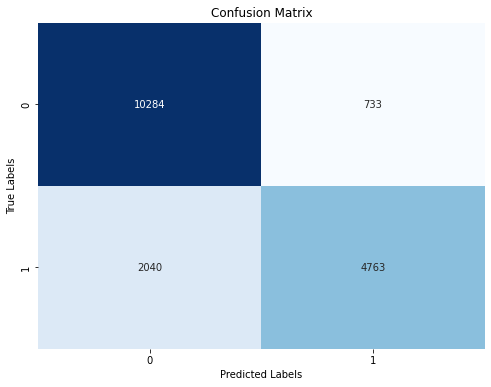

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, preds_test))
print("Precision:", metrics.precision_score(y_test, preds_test, average='macro'))
print("Recall:", metrics.recall_score(y_test, preds_test, average='macro'))
print("F1 Score:", metrics.f1_score(y_test, preds_test, average='macro'))

# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, preds_test)
print("Confusion Matrix:")
print(confusion_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Customize the plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Show the plot
plt.show()

In [ ]:
# Compute ROC curve and ROC area for the second model
preds_test_prob = my_pipeline.predict_proba(X_test)  # Make sure this is the right pipeline for the second model
fpr, tpr, _ = roc_curve(y_test, preds_test_prob[:, 1])
roc_auc = auc(fpr, tpr)
model_name = "XGBoost DT Model"  # Specify the name of your model

# Store the ROC curve and AUC in the list
roc_curves.append((fpr, tpr, roc_auc, model_name))


In [ ]:
roc_curves

[(array([0.        , 0.15811927, 1.        ]),
  array([0.        , 0.74423049, 1.        ]),
  0.7930556081656492,
  'Initial DT Model'),
 (array([0.       , 0.1635654, 1.       ]),
  [0.0, 0.75364251, 1.0],
  0.8,
  0.7900385558640676,
  'SMOTE Scaled DT Model'),
 (array([0.        , 0.        , 0.        , ..., 0.99891077, 0.99909231,
         1.        ]),
  array([0.00000000e+00, 1.46993973e-04, 2.49889755e-03, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
  0.913225502884635,
  'XGBoost DT Model'),
 (array([0.        , 0.        , 0.        , ..., 0.99891077, 0.99909231,
         1.        ]),
  array([0.00000000e+00, 1.46993973e-04, 2.49889755e-03, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
  0.913225502884635,
  'XGBoost DT Model'),
 (array([0.        , 0.        , 0.        , ..., 0.99891077, 0.99909231,
         1.        ]),
  array([0.00000000e+00, 1.46993973e-04, 2.49889755e-03, ...,
         1.00000000e+00, 1.00000000e+00, 1.00000000

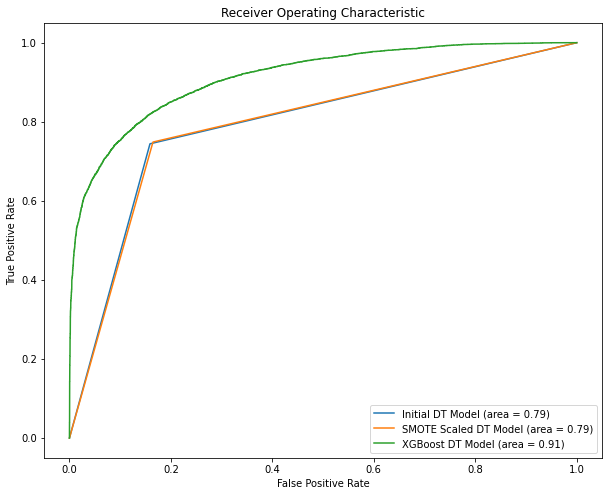

In [ ]:
# Plot ROC curves
plt.figure(figsize=(10,8))
for fpr, tpr, roc_auc, model_name in roc_curves:
    plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



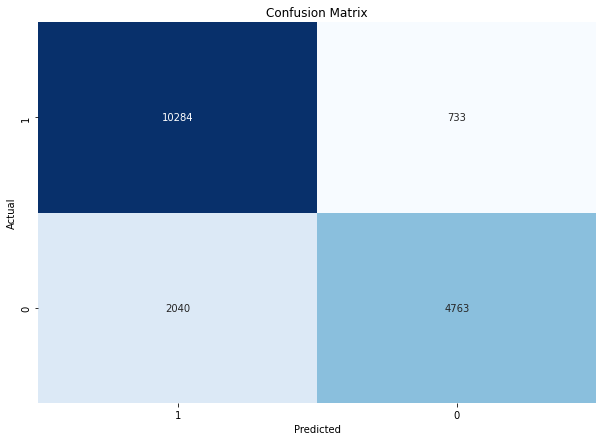

In [ ]:
# Get class names
class_names = y_test.unique()

# Create a confusion matrix
cm = metrics.confusion_matrix(y_test, preds_test)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=class_names, index=class_names)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


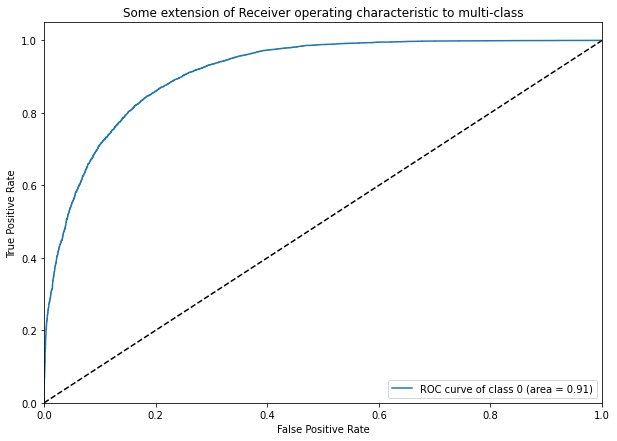

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y = label_binarize(y_test, classes=list(class_names))
n_classes = y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
# Get class probabilities
preds_test_prob = my_pipeline.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], preds_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Plot all ROC curves
plt.figure(figsize=(10,7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y[:, i], preds_test[:, i])
    average_precision[i] = average_precision_score(y[:, i], preds_test[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y.ravel(), preds_test.ravel())
average_precision["micro"] = average_precision_score(y, preds_test, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

# Plot the micro-averaged Precision-Recall curve
plt.figure()
plt.plot(recall["micro"], precision["micro"], color='gold', lw=2, label='micro


SyntaxError: EOL while scanning string literal (<ipython-input-64-b8e4f21e0653>, line 19)

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# new

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [ ]:
water_pump_dt = DecisionTreeClassifier(random_state=1)
water_pump_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
y_pred = water_pump_dt.predict(X_test)

In [ ]:
water_pump_dt_acc = accuracy_score(y_test, y_pred)
print(f'Water Pump Decision Tree accuracy: {water_pump_dt_acc}')

Water Pump Decision Tree accuracy: 0.8118518518518518


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Create and train the decision tree classifier
water_pump_dt_acc = DecisionTreeClassifier()
water_pump_dt_acc.fit(X_train, y_train)

unique_classes = y.unique().astype(str)  # Convert unique classes to strings

# Plot the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(water_pump_dt_acc, filled=True, feature_names=X.columns, class_names=unique_classes)
plt.show()



NameError: name 'X_train' is not defined

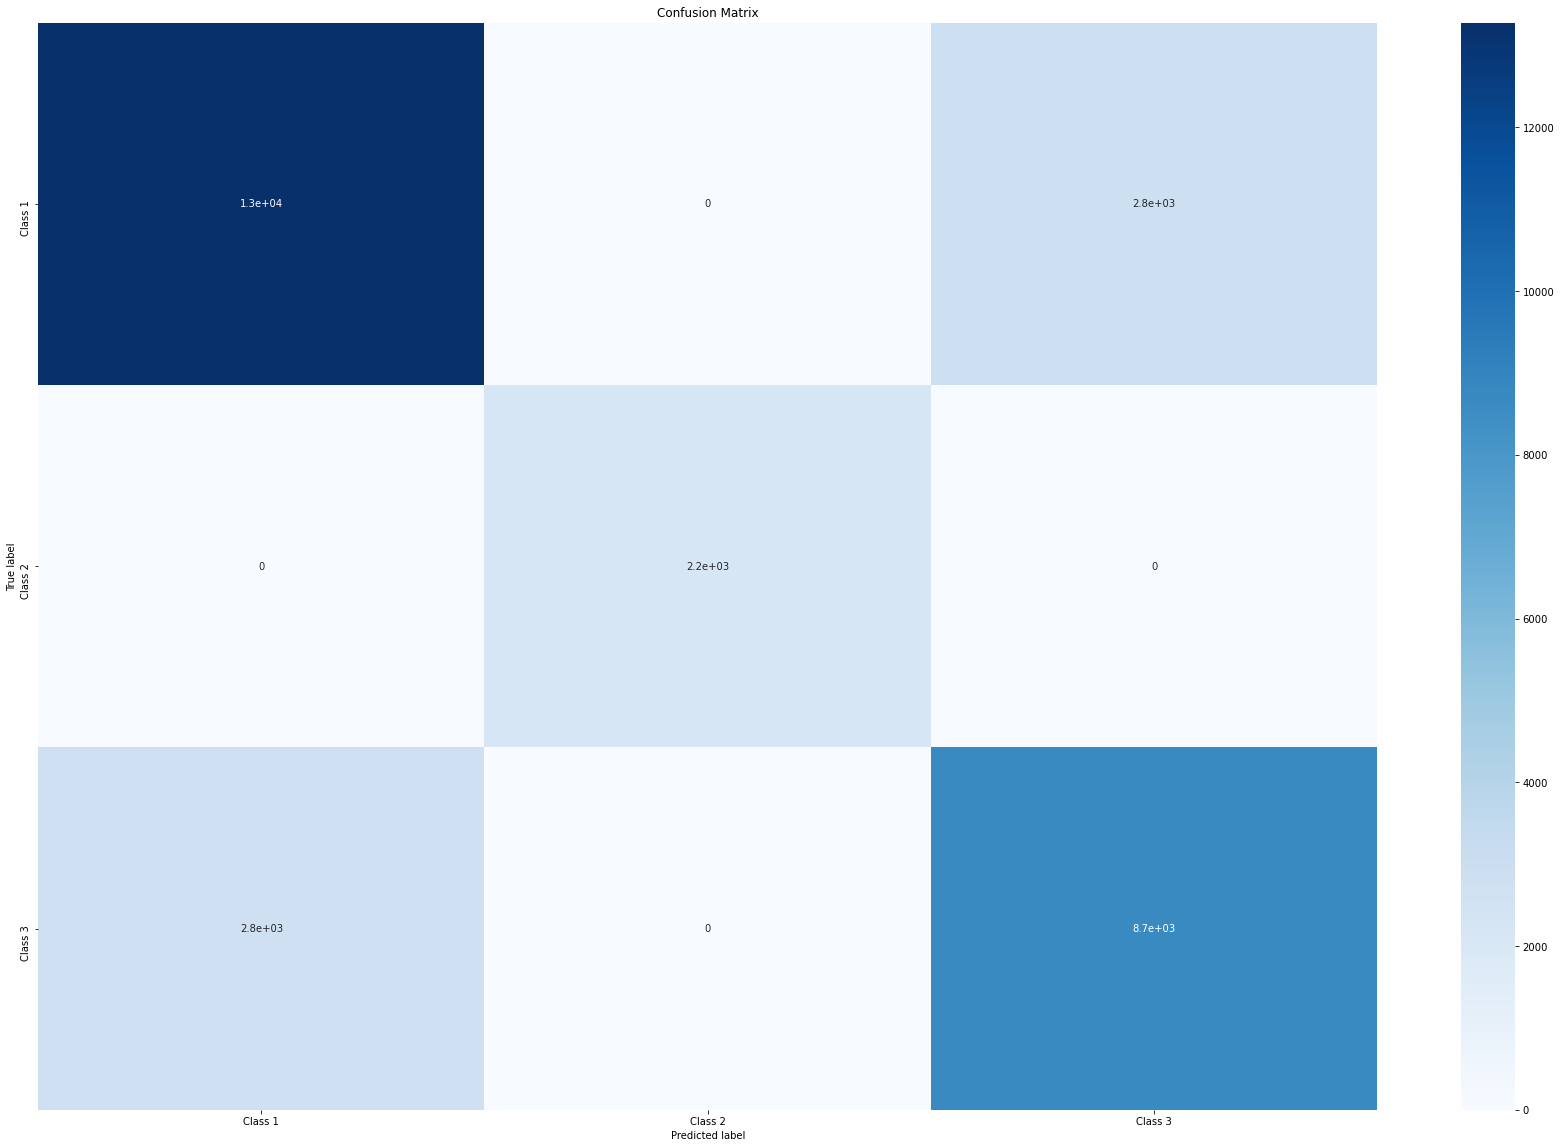

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Class 1', 'Class 2', 'Class 3'], columns=['Class 1', 'Class 2', 'Class 3'])

# Plot confusion matrix using Seaborn
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
from hyperopt import hp, tpe, fmin, STATUS_OK
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the search space
space = {
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
    'max_depth': hp.choice('max_depth', range(1, 31)),
    'min_samples_split': hp.uniform('min_samples_split', 0, 1),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
}

# Objective function
def objective(params):
    model = DecisionTreeClassifier(**params)
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run the algorithm
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)
print("Best: ", best)



100%|██████████| 100/100 [01:35<00:00,  1.04trial/s, best loss: -0.7891582491582491]
Best:  {'criterion': 1, 'max_depth': 11, 'min_samples_leaf': 0.01414617042917414, 'min_samples_split': 0.00047562994642830203}


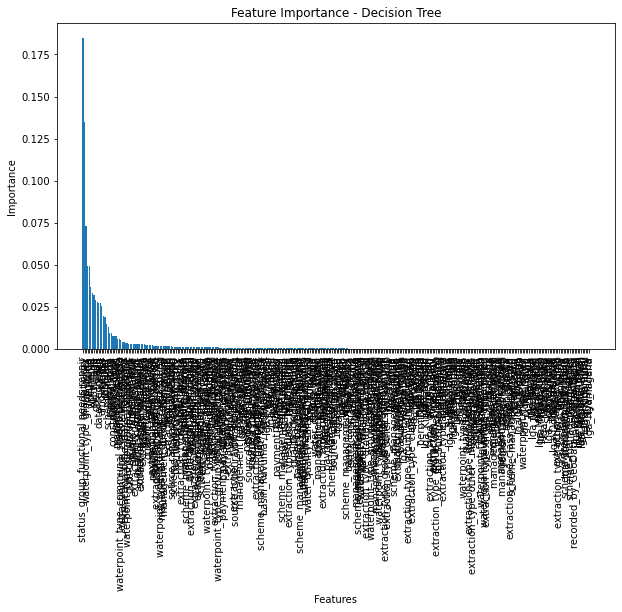

In [ ]:
import matplotlib.pyplot as plt

# Train the decision tree model (replace `DecisionTreeClassifier` with your actual model)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.show()


In [ ]:
top_features = sorted_features[:50]
for feature in top_features:
    print(feature)


NameError: name 'sorted_features' is not defined